In [47]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
os.chdir("C:\\Users\\pravesh.tiwari\\Documents\\Python\\Statistical Modeling")
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.columns)
data.head()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [50]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [53]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [54]:
#checking the car names again
data['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [55]:
#Checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [56]:
# recognising categorical features
cat_features = data.dtypes[data.dtypes == 'object'].index
print('No of categorical fetures:',len(cat_features),'\n')
print(cat_features)

# recognising numerical features
num_features = data.dtypes[data.dtypes != 'object'].index
print('No of numerical fetures:',len(num_features),'\n')
print(num_features)

No of categorical fetures: 10 

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
No of numerical fetures: 16 

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


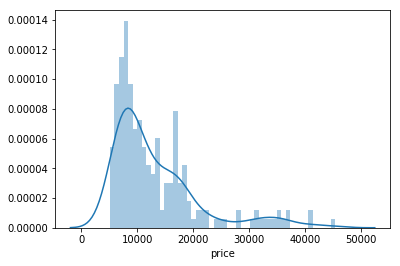

In [57]:
sns.distplot(data['price'], bins=50)
plt.show()

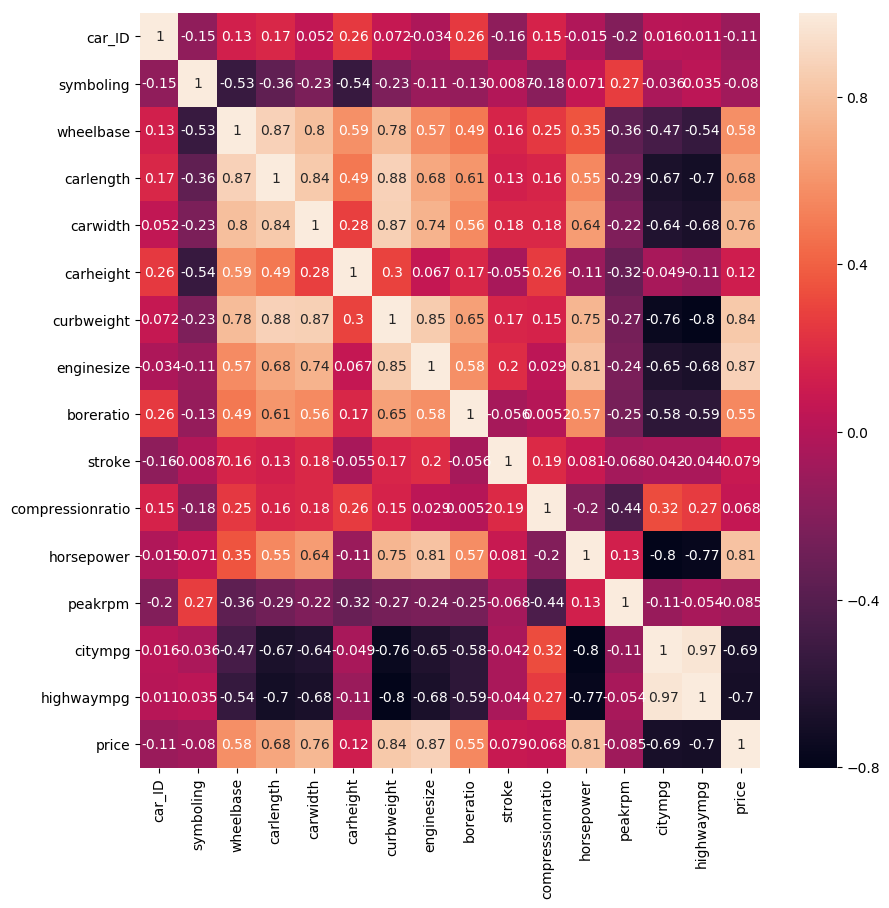

In [58]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(data[num_features].corr(), annot=True)
plt.show()

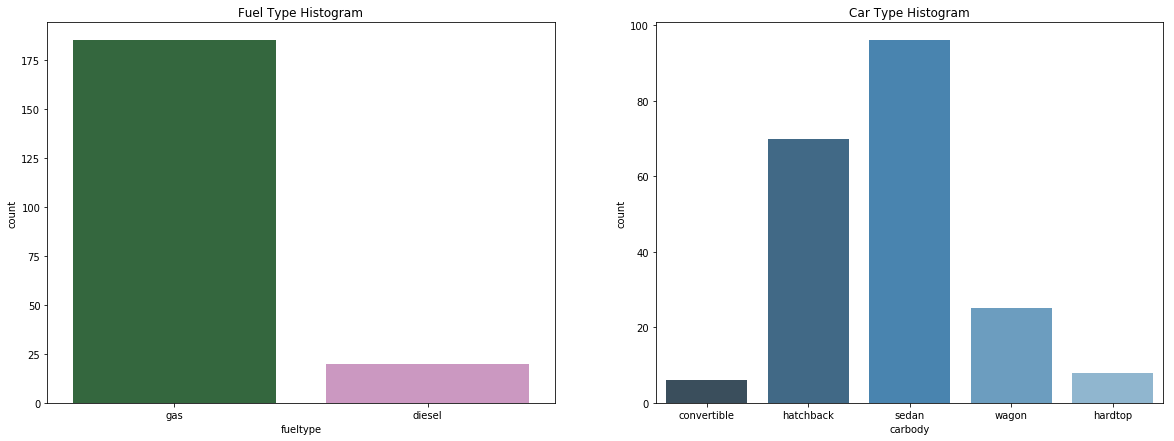

In [59]:
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(data.fueltype, palette=("cubehelix"))


plt.subplot(1,2,2)
plt.title('Car Type Histogram')
sns.countplot(data.carbody, palette=("Blues_d"))

plt.show()

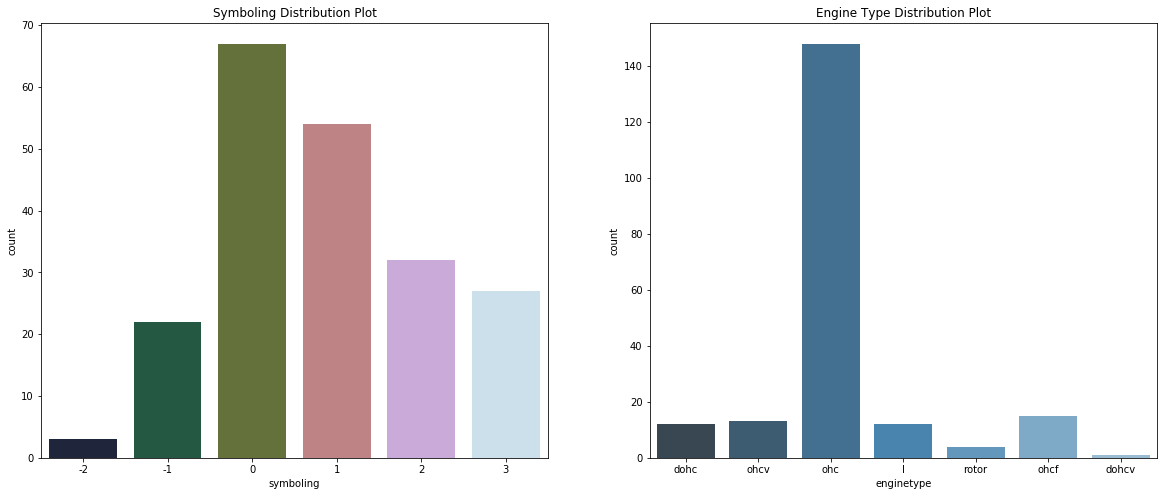

In [60]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Distribution Plot')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Engine Type Distribution Plot')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.show()

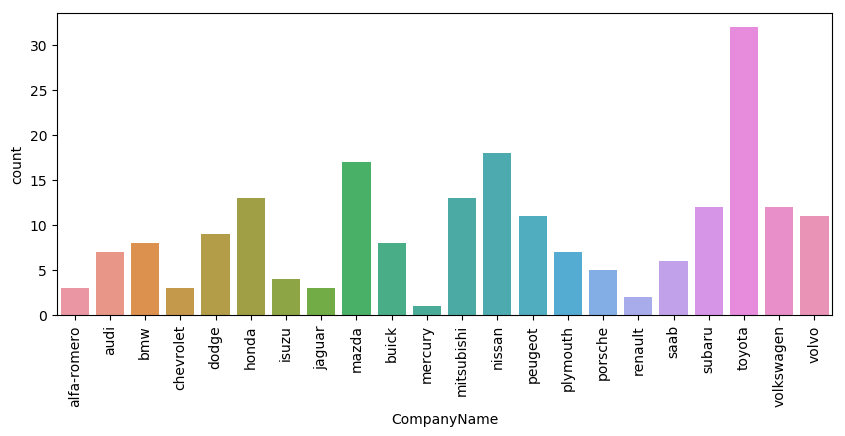

In [61]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data['CompanyName'])
plt.xticks(rotation=90)
plt.show()

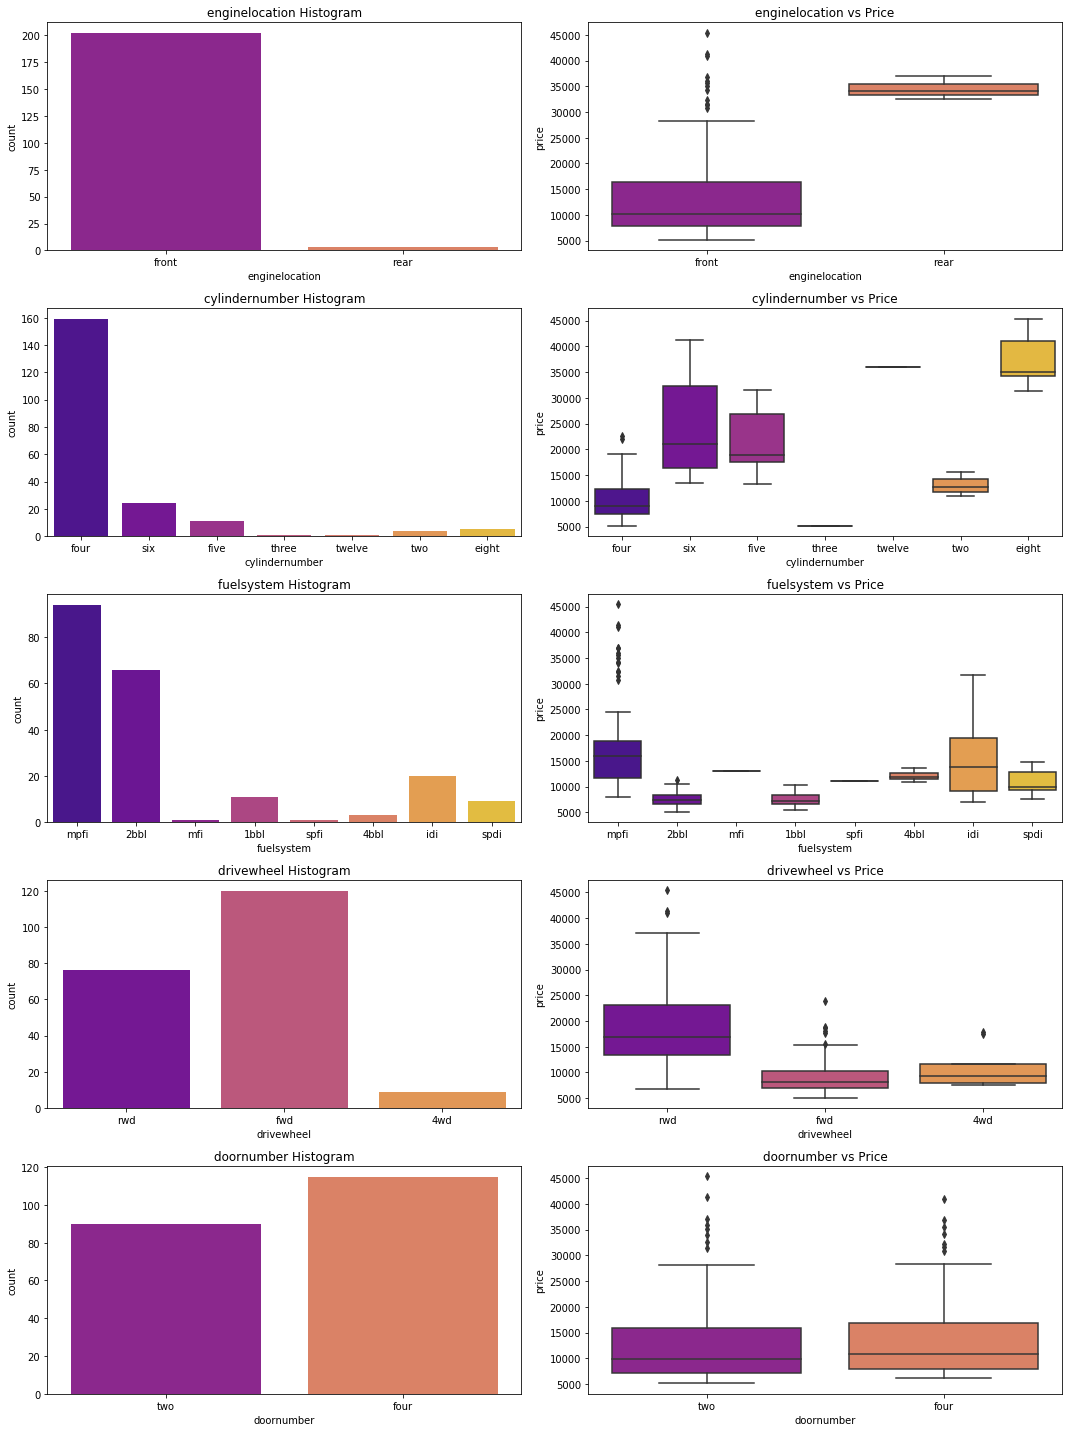

In [62]:
def plot_count(x,fig):
    plt.subplot(5,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("plasma"))
    plt.subplot(5,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("plasma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)
plot_count('doornumber', 9)

plt.tight_layout()

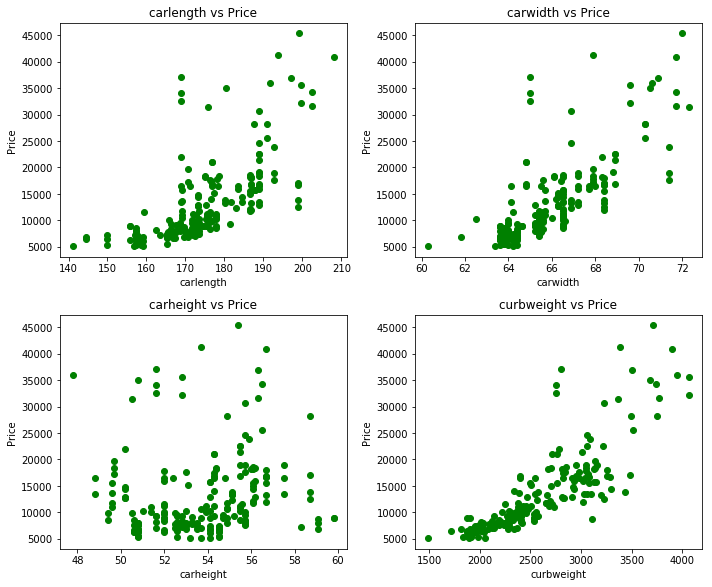

In [63]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'], color = 'green')
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [64]:
def dummies(cols,df):
    df = pd.get_dummies(df, columns = cols)
    return df
# Applying the function to the data
print(data.columns)
cols_list = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','fuelsystem']
data = dummies(cols_list,data)
print(data.columns)

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Index(['car_ID', 'symboling', 'CompanyName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
 

In [65]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.85, test_size = 0.15, random_state = 100)

In [66]:
#Dividing data into X and y variables
y_train = df_train.price
X_train = df_train.drop(["price", "CompanyName", "car_ID", "doornumber", "enginelocation"], axis = 1)
X_train = X_train.astype(float)
X_train.columns
#X_train.to_csv("Train.csv")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [67]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 31),
 ('wheelbase', False, 32),
 ('carlength', False, 34),
 ('carwidth', False, 12),
 ('carheight', False, 36),
 ('curbweight', False, 37),
 ('enginesize', False, 28),
 ('boreratio', True, 1),
 ('stroke', False, 9),
 ('compressionratio', False, 20),
 ('horsepower', False, 29),
 ('peakrpm', False, 38),
 ('citympg', False, 23),
 ('highwaympg', False, 24),
 ('fueltype_diesel', False, 18),
 ('fueltype_gas', False, 19),
 ('aspiration_std', False, 21),
 ('aspiration_turbo', False, 5),
 ('carbody_convertible', False, 3),
 ('carbody_hardtop', False, 13),
 ('carbody_hatchback', False, 8),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 10),
 ('drivewheel_4wd', False, 33),
 ('drivewheel_fwd', False, 27),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohc', False, 30),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 22),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 14),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernu

In [70]:
print(X_train.columns[rfe.support_])
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

Index(['boreratio', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')


In [26]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    #vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [27]:
model = sm.OLS(y_train, X_train_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     85.83
Date:                Wed, 01 Jan 2020   Prob (F-statistic):           2.19e-57
Time:                        12:42:27   Log-Likelihood:                -1659.1
No. Observations:                 174   AIC:                             3338.
Df Residuals:                     164   BIC:                             3370.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5601.28

In [28]:
checkVIF(X_train_rfe)

,Features,VIF
0,const,223.81
1,boreratio,1.52
2,drivewheel_rwd,1.89
3,enginetype_dohcv,1.54
4,enginetype_ohcv,1.95
5,enginetype_rotor,inf
6,cylindernumber_eight,1.98
7,cylindernumber_four,1.79
8,cylindernumber_three,1.06
9,cylindernumber_twelve,1.17


In [29]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_two', 'enginetype_rotor'], axis = 1)

In [30]:
model = sm.OLS(y_train, X_train_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     73.51
Date:                Wed, 01 Jan 2020   Prob (F-statistic):           1.94e-50
Time:                        12:42:30   Log-Likelihood:                -1678.6
No. Observations:                 174   AIC:                             3375.
Df Residuals:                     165   BIC:                             3404.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9248.11

Text(0.5,0,'Errors')

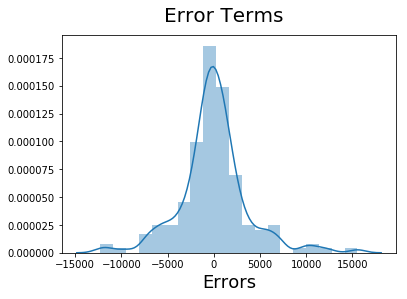

In [31]:
# Plot the histogram of the error terms
y_train_price = model.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Text(0,0.5,'Residuals')

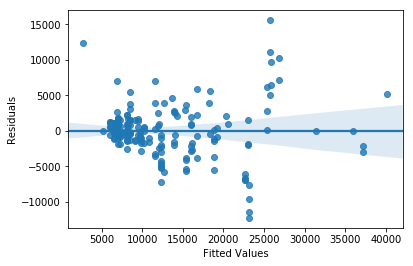

In [32]:
residuals = y_train - y_train_price
sns.regplot(y_train_price,residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [33]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(residuals, X_train_rfe)
pval, f_pval

(3.8705326964666335e-08, 1.7634217755048319e-09)

## Model Lack Homoscedasticity

In [37]:
import numpy as np
Log_Y = np.log(y_train)
model = sm.OLS(Log_Y, X_train_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     69.47
Date:                Wed, 01 Jan 2020   Prob (F-statistic):           6.99e-49
Time:                        12:43:20   Log-Likelihood:                0.20817
No. Observations:                 174   AIC:                             17.58
Df Residuals:                     165   BIC:                             46.02
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.62

Text(0.5,0,'Errors')

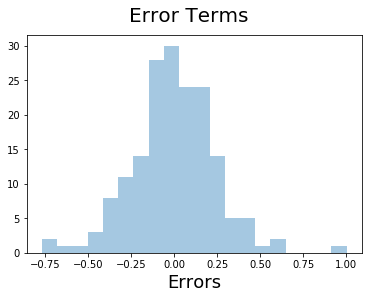

In [38]:
# Plot the histogram of the error terms
y_train_price = model.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((Log_Y - y_train_price), bins = 20, kde = False)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Text(0,0.5,'Residuals')

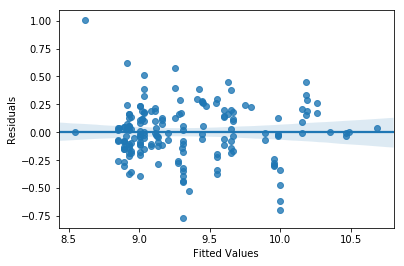

In [39]:
residuals = Log_Y - y_train_price
sns.regplot(y_train_price,residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [40]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(residuals, X_train_rfe)
pval, f_pval

(0.6592442938814735, 0.6710417609846666)

## Test Data Pre Processing

In [42]:
y_test = df_test.price
X_test_rfe = df_test.filter(list(X_train_rfe.columns))
X_test_rfe = sm.add_constant(X_test_rfe)
#X_test = X_test_rfe.drop(["price", "CompanyName", "car_ID", "doornumber", "enginelocation", "cylindernumber_two"], axis = 1)
X_test_rfe.columns

Index(['const', 'boreratio', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

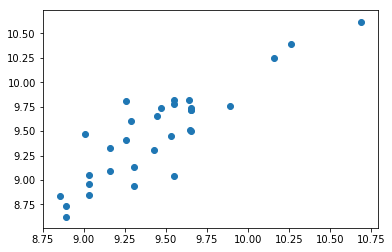

In [43]:
y_test_pred = model.predict(X_test_rfe)
plt.scatter(y_test_pred,np.log(y_test))

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#calculating r2_score 
r2_score(np.log(y_test),y_test_pred)

0.7636130404385019

In [45]:
mean_squared_error(np.log(y_test),y_test_pred)

0.05254691544347267

In [46]:
#calculating mean squared error for traning set
mean_squared_error(Log_Y,y_train_price)

0.05840990576192713